# Extraction de Keywords

## Imports

In [1]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

https://github.com/LIAAD/yake

In [2]:
# Création d'une liste de mots à ignorer
ignored = set(["conseil communal", "conseil général"])
ignored

{'conseil communal', 'conseil général'}

In [3]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [4]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [5]:
# Imprimer le nombre de fichiers identifiés
len(files)

2828

In [6]:
# Les dix premiers fichiers
files[:20]

['Bxl_1847_Tome_I1_Part_1.txt',
 'Bxl_1847_Tome_I1_Part_2.txt',
 'Bxl_1847_Tome_I1_Part_3.txt',
 'Bxl_1847_Tome_I1_Part_4.txt',
 'Bxl_1847_Tome_I1_Part_5.txt',
 'Bxl_1848_Tome_I1_Part_1.txt',
 'Bxl_1848_Tome_I1_Part_2.txt',
 'Bxl_1848_Tome_I1_Part_3.txt',
 'Bxl_1849_Tome_I1_Part_1.txt',
 'Bxl_1849_Tome_I1_Part_2.txt',
 'Bxl_1849_Tome_I1_Part_3.txt',
 'Bxl_1849_Tome_I1_Part_4.txt',
 'Bxl_1849_Tome_I1_Part_5.txt',
 'Bxl_1849_Tome_II1_Part_1.txt',
 'Bxl_1849_Tome_II1_Part_2.txt',
 'Bxl_1849_Tome_II1_Part_3.txt',
 'Bxl_1849_Tome_II1_Part_4.txt',
 'Bxl_1849_Tome_II1_Part_5.txt',
 'Bxl_1849_Tome_II1_Part_6.txt',
 'Bxl_1849_Tome_II1_Part_7.txt']

In [7]:
# Enlever tout ce qui n'est pas 1850_
bxl_files = [f for f in files if f.startswith('Bxl_1850')]
len(bxl_files)

11

In [8]:
# Choisir un fichier
this_file = bxl_files[0]
this_file

'Bxl_1850_Tome_I1_Part_1.txt'

In [9]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r').read()
text[:500]

"LLETIN COMMUNAL.\nANNÉE 1850.\n\nPREMIER\n\nSEMESTRE,\n\nBRUXELLES,\nOIS-WITTOI'CK\n\n,\n\nIMPlUMtVR\n\nDE\n\nLA\n\nVILLE,\n\n1U K\n\n\\V\n\nl\n\n\x0clïi\n\n\x0cVILLE\n\nDE\n\nBRUXELLES.\n\nBULLETIN COMMUNAL.\nANNÉE 1 8 5 0 . —\n\nN° 1.\n\nTravaux publics. — Adjudications.\n\nLe Collège des Bourgmestre et Echevins de la ville de Bruxelles\nProcédera, en séance publique, le mardi 5 février 1850, à une\nheure de relevée, à l'ouverture des soumissions qui l u i seront présentées pour l'entreprise des travaux et fournitures désignés c i dessous, sa"

In [10]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)

In [11]:
keywords

[('rue', 0.0010203251110308864),
 ('Conseil', 0.0011009039237165025),
 ('voitures', 0.0012910846402678213),
 ('Collège', 0.001877898228826985),
 ('place', 0.002153910637756349),
 ('section', 0.0024431609981411316),
 ("C'est", 0.002453131054529531),
 ('projet', 0.003174005484990999),
 ('passage', 0.0033290094686373338),
 ("d'une", 0.0035228065784508626),
 ('mètres', 0.003649789913221464),
 ('conseil général', 0.003843018136367814),
 ('rues', 0.004008420079049911),
 ('file', 0.004238524473826562),
 ('faire', 0.004898761072720222),
 ('Montagne', 0.004939602615273893),
 ('recettes', 0.005328051454739125),
 ('galerie', 0.005450882300386584),
 ('voitures de place', 0.005762916290853499),
 ('Bourgmestre', 0.005765993913574205),
 ('francs', 0.006110700529671702),
 ('seule file', 0.006263318531967193),
 ('hospices', 0.0063642148314371335),
 ('VILLE', 0.006387810997453652),
 ('théâtre', 0.006390721272195832),
 ('Partoes', 0.006851593558954148),
 ('stationnement', 0.006903566821449217),
 ('servic

## Faire la même opération sur tous les documents

In [12]:
for f in sorted(bxl_files)[:11]:
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2 and kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1850_Tome_I1_Part_1.txt mentions these keywords: seule file, voitures commandées, service courant, travaux publics, place disponibles...
Bxl_1850_Tome_I1_Part_2.txt mentions these keywords: société civile, d'une rue...
Bxl_1850_Tome_I1_Part_3.txt mentions these keywords: enfants trouvés, service courant, caisse générale, conseil adopte, conseil d'une, conseil provincial, projet d'adresse, députation permanente...
Bxl_1850_Tome_I1_Part_4.txt mentions these keywords: enfants trouvés, enfants abandonnés, députation permanente, enfants exposés, enfants délaissés, c'est faire...
Bxl_1850_Tome_II1_Part_1.txt mentions these keywords: travaux publics, construction d'un, d'un pont, rue nouvelle, enfants trouvés, d'une rue, conseil adopte...
Bxl_1850_Tome_II1_Part_2.txt mentions these keywords: compte moral, mètres toile, travaux publics, grand nombre, service sanitaire, l'administration communale...
Bxl_1850_Tome_II1_Part_3.txt mentions these keywords: maison rue, voie publique, petite rue,

# Nuages de mots

In [13]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Stopwords 
sw = stopwords.words("french")
sw += ["cette", "les","le","la", "plus","moins","cet", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous", "celle", "entre", "encore", 
       "toutes", "pendant", "moins", "dire", "cela", "non", "faut", "trois", "aussi", "dit", "avoir", "doit", 
       "contre", "depuis", "autres", "van", "het", "autre", "jusqu", "ville","leurs","seulement","ensemble","donner",
       "toute", "suivant", "elles", "celles", "années", "monsieur", "messieurs", "total", "côté", "quatre", "celui", "rendre",
       "porte", "avant", "après", "année", "quelques", "derniers", "laquelle", "temps", "arrêté", "premier","trouvés","forme",
      "quand", "sieur", "manière", "ceux", "beaucoup", "peu","nouvelle", "vert", "lieu", "heures", "part", "jean", "car", "très",
       "fois", "agit", "bruxelles", "tandis","jour", "crois", "suite", "peuvent", "prendre", "grand", "devant", "déjà", "parce", "suivants",
       "aucune","pourrait", "point", "aucun", "aucune", "six", "mettre", "partie", "mois", "dernier", "grande", "jour", "donné", "appartenant",
       "reste", "trouve", "mis", "assez", "également", "donne", "vers", "aujourd", "hui", "rien", "chaque", "rue", "tant", "dessus", 
       "dessous", "faites", "faite","plusieurs", "jours", "rues", "présente", "moyens", "objet", "un", "deux", "trois", "quatre", "ares",
       "cinq", "six", "sept", "huit", "neuf", "dix","courant", "relatives", "administration", "service", "bourgmestre", "nombre", "mise",
       "section", "collège", "francs", "rapport", "conseil", "séance","publique", "situation", "centimètres", "communication", "lieu",
       "mètres", "position", "général", "relative", "public", "demande", "janvier", "février", "mars", "avril", "mai", "juin", "services",
       "juillet", "août", "septembre", "octobre", "novembre", "décembre", "place", "compte", "adopté","effet", "hommes", "membres", "section",
       "voie", "établissements", "passage", "adresse", "cause", "conditions", "raison", "savoir", "population","intérieur", "diverses", 
       "bas", "produit", "quelque", "maison", "société", "article", "autant", "cas", "doivent", "somme", "chiffre ", "laisser", "environ",
       "affaire", "autant", "intérêt", "discussion", "chose", "bon", "habitants", "nécessaire", "trouvés", "trop", "alors", "devoir", 
       "seule", "donnée", "ans", "classe", "partir", "avis", "chez", "cependant", "pris", "soumis", "seul", "lettre", "vue", "surtout",
       "quant", "abandonnés", "valeur", "maisons", "doivent", "plusieurs", "dernière", "discussion", "heure", "cas", "pièces", "chose", "soumis", 
       "personnes", "affaire", "travail", "communale", "communales", "quant", "seule", "lettre", "vue", "trop", "heure", "partir", "nécessaire", "question", 
       "conclusions", "etc", "bon", "pris", "possible", "nouveau", "alors", "pouvoir", "entrée", "moment", "chez", "jamais", "propose", "matière", 
       "centimes", "ans", "matin", "voir", "lot", "fera", "devront", "société", "petite", "admis", "domicile", "justice", "enfin", "établir", 
       "pourra", "cependant", "communal", "autant", "nom", "font", "lorsqu", "lorsque", "dès", "tour", "article", "soumettre", "autorité", "différence", 
       "première", "moyen","voici", "cent", "exercice", "autant", "faits", "mêmes", "but", "existe", "afin", "donnée", "proposons", "divers", 
       "verbal", "avis", "générale","kilog", "solde", "voix", "titre", "termes", "doute", "seul", "chiffre", "personne", "articles", "établi", "suit", 
       "bureau", "classe", "galerie", "communes", "somme","obtenir", "delà", "charge", "direction", "compris", "prochaine", "devoir", "file", 
       "nature", "bonne", "examen", "près", "parmi", "vient","mètre","art", "payer", "recevoir", "petit", "sorte", "égard", "publics", "ailleurs", 
       "reçu", "reçus", "conséquence", "toujours", "premiers", "supérieure", "conformément", "permanente", "moitié", "chacun", "date", "devons", "mère",
      "sujet", "toutefois"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [15]:
# Choisir une année
year = 1850

In [16]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1850_Tome_I1_Part_1.txt',
 'Bxl_1850_Tome_I1_Part_2.txt',
 'Bxl_1850_Tome_I1_Part_3.txt',
 'Bxl_1850_Tome_I1_Part_4.txt',
 'Bxl_1850_Tome_II1_Part_1.txt',
 'Bxl_1850_Tome_II1_Part_2.txt',
 'Bxl_1850_Tome_II1_Part_3.txt',
 'Bxl_1850_Tome_II1_Part_4.txt',
 'Bxl_1850_Tome_II1_Part_5.txt',
 'Bxl_1850_Tome_II1_Part_6.txt',
 'Bxl_1850_Tome_II1_Part_7.txt']

In [17]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [18]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

11

In [19]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"LLETIN COMMUNAL.\nANNÉE 1850.\n\nPREMIER\n\nSEMESTRE,\n\nBRUXELLES,\nOIS-WITTOI'CK\n\n,\n\nIMPlUMtVR\n\nDE\n\nLA\n\nVILLE,\n\n1U K\n\n\\V\n\nl\n\n\x0clïi\n\n\x0cVILLE\n\nDE\n\nBRUXELLES.\n\nBULLETIN COMMUNAL.\nANNÉE 1 8 5 0 . —\n\nN° 1.\n\nTravau"

In [20]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [21]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"LLETIN COMMUNAL.\nANNÉE 1850.\n\nPREMIER\n\nSEMESTRE,\n\nBRUXELLES,\nOIS-WITTOI'CK\n\n,\n\nIMPlUMtVR\n\nDE\n\nLA\n\nVILLE,\n\n1U K\n\n\\V\n\nl\n\n\x0clïi\n\n\x0cVILLE\n\nDE\n\nBRUXELLES.\n\nBULLETIN COMMUNAL.\nANNÉE 1 8 5 0 . —\n\nN° 1.\n\nTravaux publics. — Adjudications.\n\nLe Collège des Bourgmestre et Echevins de la ville de Bruxelles\nProcédera, en séance publique, le mardi 5 février 1850, à une\nheure de relevée, à l'ouverture des soumissions qui l u i seront présentées pour l'entreprise des travaux et fournitures désignés c i dessous, sa"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [22]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [23]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/1850_clean.txt!'

In [24]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'lletin semestre ois wittoi implumtvr lïi bulletin travaux adjudications echevins procédera mardi relevée ouverture soumissions présentées entreprise travaux fournitures désignés travaux achèvement caserne château construction rampe circulaire panoramas confection mobilier école construction estacades pont canal trous fourniture pose tablettes pierre bleue quais canal fourniture tuyaux fonte conduites deau confection pose bancs parc fourniture chaises casernes chacune entreprises adjugée soumissi'

## Nuage de mots

### Afficher les termes les plus fréquents


In [25]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('enfants', 639), ('hospices', 422), ('travaux', 362), ('projet', 321), ('secours', 308), ('caisse', 279), ('proposition', 268), ('budget', 267), ('finances', 266), ('frais', 264)]


### Créer, stocker et afficher le nuage de mots

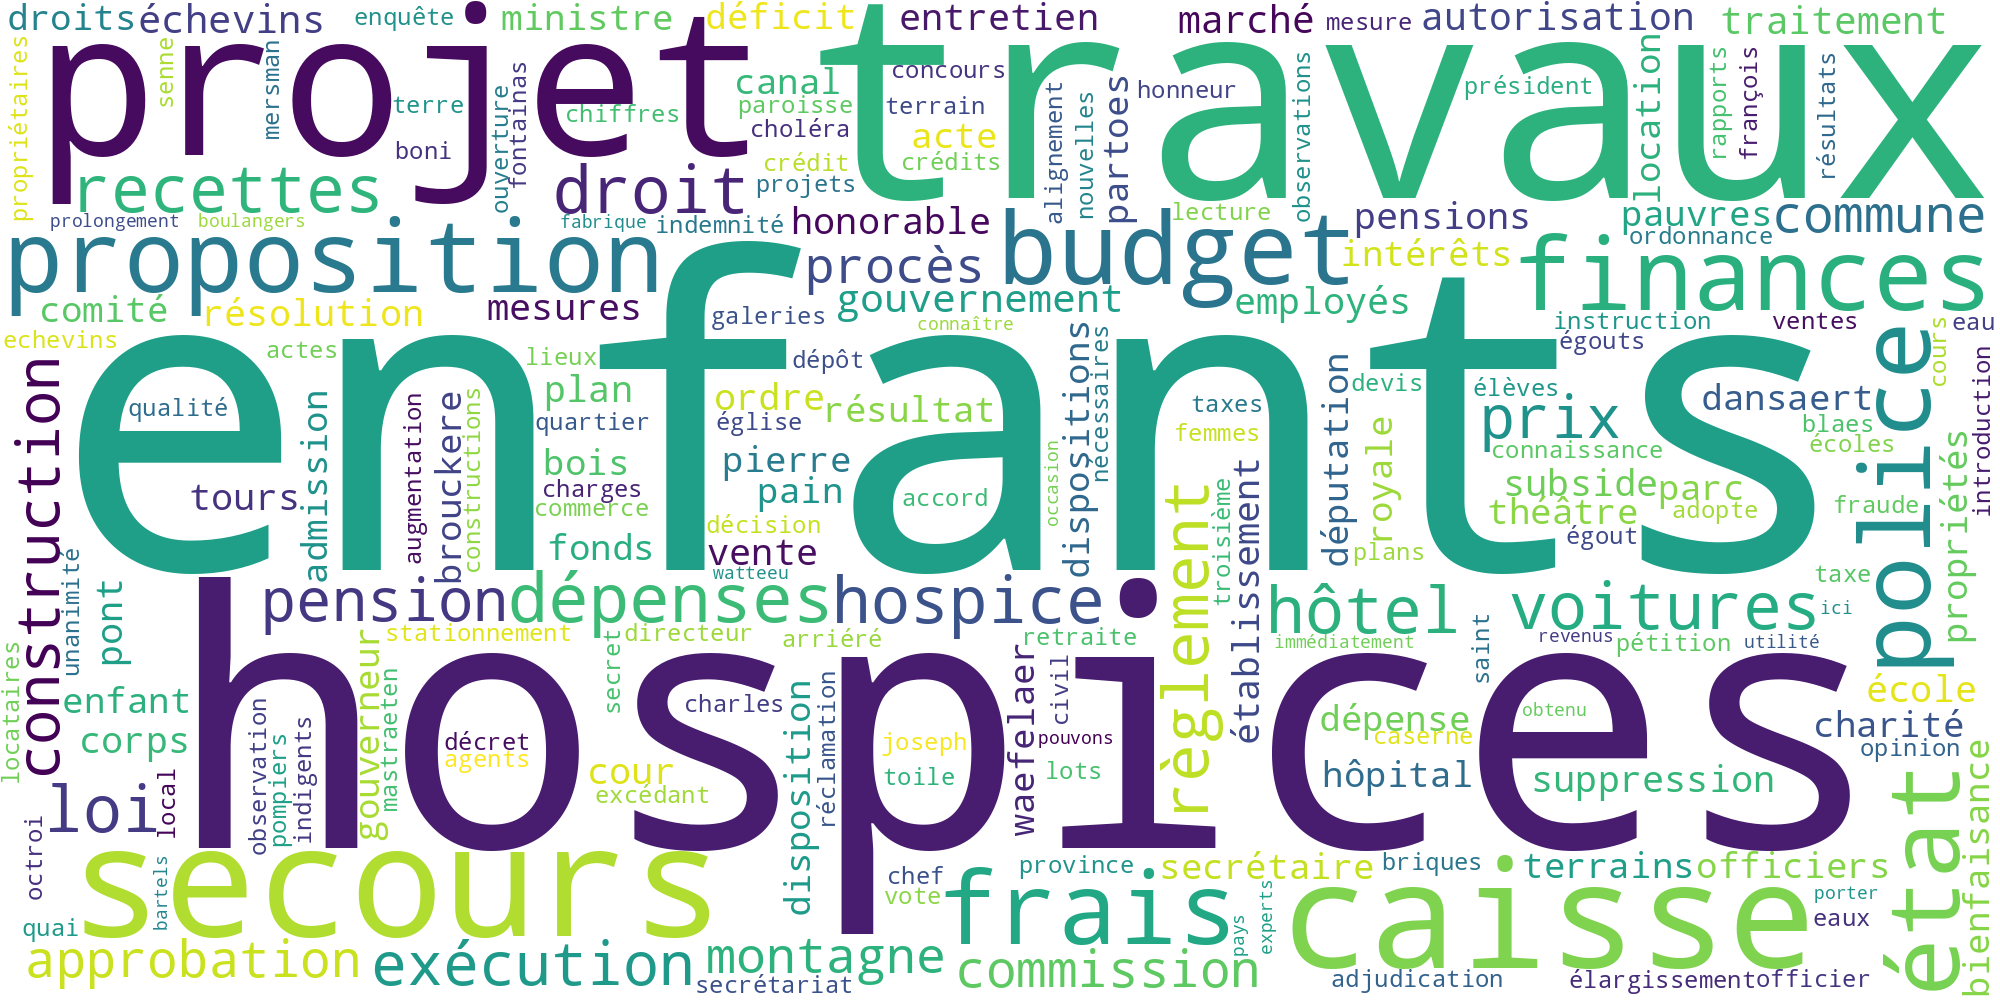

In [26]:
cloud = WordCloud(stopwords = sw,width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy

## Imports

In [27]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [28]:
nlp = spacy.load('fr_core_news_md')

## Appliquer la reconnaissance d'entités nommées l'année 1850

In [29]:
# Charger le texte
n=900000
text = open("../data/1850_clean.txt", encoding='utf-8').read()[:n]

In [30]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 27 s, sys: 845 ms, total: 27.8 s
Wall time: 27.8 s


### Afficher les personnes


In [31]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [32]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois en 1850")

dansaert apparait 52 fois en 1850
kaulman apparait 19 fois en 1850
charles brouckere apparait 14 fois en 1850
mastraeten capouillet apparait 13 fois en 1850
ranwet gaver apparait 12 fois en 1850
vanderlinden apparait 10 fois en 1850
léopold apparait 9 fois en 1850
mersman apparait 8 fois en 1850
vadder trumper apparait 8 fois en 1850
vandenkerckhove apparait 8 fois en 1850
madeleine apparait 7 fois en 1850
doncker dansaert apparait 7 fois en 1850
verhulst blaes orts apparait 6 fois en 1850
watteeu apparait 6 fois en 1850
anoul apparait 6 fois en 1850
gend apparait 6 fois en 1850
bartels apparait 5 fois en 1850
fontainas apparait 5 fois en 1850
napoléon apparait 5 fois en 1850
linthout apparait 5 fois en 1850
kaieman apparait 5 fois en 1850
dero becker apparait 5 fois en 1850
melot apparait 4 fois en 1850
pierre joseph apparait 4 fois en 1850
hôtel brouckere apparait 4 fois en 1850
blaes apparait 4 fois en 1850
spaack apparait 4 fois en 1850
michel gudule apparait 4 fois en 1850
echevin

### Afficher les organisations


In [33]:
# Compter les organisations
organisation = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organisation[ent.text] += 1

In [34]:
# Trier et imprimer

sorted_organisation = sorted(organisation.items(), key=lambda kv: kv[1], reverse=True)

for organisation, freq in sorted_organisation[:50]:
    print(f"{organisation} apparait {freq} fois en 1850")

waefelaer apparait 4 fois en 1850
montfalcon apparait 2 fois en 1850
canlersteen apparait 2 fois en 1850
rupel apparait 2 fois en 1850
idem apparait 2 fois en 1850
waefelaer droit apparait 1 fois en 1850
bation hospices finances apparait 1 fois en 1850
ïètes apparait 1 fois en 1850
waefelaer toile apparait 1 fois en 1850
arenberg apparait 1 fois en 1850
soustrairez apparait 1 fois en 1850
cluysenaar établissement galeries couvertes apparait 1 fois en 1850
waefelaer échevins entreprise écoles apparait 1 fois en 1850
waefelaer voitures échevins connaissance résolution apparait 1 fois en 1850
waefelaer chiens échevins honneur apparait 1 fois en 1850
sieurmiehiols convention apparait 1 fois en 1850
zellick location paf tie apparait 1 fois en 1850
bis idem apparait 1 fois en 1850
gand liège apparait 1 fois en 1850
waefelaer proposition apparait 1 fois en 1850
brephotrophia apparait 1 fois en 1850
noijbrûnmjèl onu apparait 1 fois en 1850
kalcknven apparait 1 fois en 1850
dewit apparait 1 foi

### Afficher les lieux 



In [35]:
# Compter les lieux 
lieux = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        lieux[ent.text] += 1

In [36]:
# Trier et imprimer

sorted_lieux = sorted(lieux.items(), key=lambda kv: kv[1], reverse=True)

for lieux, freq in sorted_lieux[:50]:
    print(f"{lieux} apparait {freq} fois en 1850")

paris apparait 20 fois en 1850
belgique apparait 16 fois en 1850
france apparait 12 fois en 1850
canal charleroy apparait 8 fois en 1850
gand apparait 5 fois en 1850
angleterre apparait 4 fois en 1850
namur apparait 4 fois en 1850
pachéco apparait 4 fois en 1850
laeken apparait 3 fois en 1850
vilvorde apparait 3 fois en 1850
flandre apparait 3 fois en 1850
cologne apparait 2 fois en 1850
ixelles apparait 2 fois en 1850
anderlecht apparait 2 fois en 1850
josse apparait 2 fois en 1850
klle apparait 2 fois en 1850
ninove apparait 2 fois en 1850
état apparait 2 fois en 1850
esplanade namur apparait 2 fois en 1850
willebroek apparait 2 fois en 1850
vandcrlinden apparait 2 fois en 1850
melun apparait 2 fois en 1850
belliard apparait 2 fois en 1850
liedts apparait 2 fois en 1850
boivin apparait 2 fois en 1850
thisselt apparait 2 fois en 1850
lletin apparait 1 fois en 1850
tagne apparait 1 fois en 1850
ixelles établissement station fer ture portes régent apparait 1 fois en 1850
cantersteen app

# Sentiment analysis avec Textblob-FR

## Imports

In [37]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

## Fonction

In [38]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Sélection phrases arbitraires




In [44]:
import random
text = open("../data/1850.txt", encoding='utf-8').read()[:n]
sentence = nltk.tokenize.sent_tokenize(text)
random_sentence = random.choice (sentence) 


In [45]:
print (random_sentence) 
get_sentiment(random_sentence)

Les articles 6 à 41 et dernier sont successivement mis aux voix
et adoptés.
This text is 29% negative and 0.2% subjective.


### 10 Phrases arbitraires retenues





In [46]:
#1
get_sentiment("Fait à l'Hôtel de v i l l e , le 19 février 4850.")

This text is neutral and perfectly objective.


In [47]:
#2
get_sentiment("L e d a n g e r d i m i n u e , m a i s n e disparaît p a s .")

This text is neutral and perfectly objective.


In [48]:
#3
get_sentiment("— Communications de M. le Bourgmestre, relatives 1° à l'emploi du produit de la quête faite au profit des incendiés de la rue d'Isabelle; 2° au résultat des recettes communales en 1849. ")

This text is neutral and 0.15% subjective.


In [49]:
#4
get_sentiment("Le Conseil appelé à opter entre la première et l a deuxième c o m binaison, se prononce p o u r la première par 23 voix contre 4.")

This text is 34% positive and 0.13333333333333333% subjective.


In [50]:
#5
get_sentiment("Car si elle était résolue négativement, ce serait prendre une peine inutile que de faire une enquête de commodo et incommodo.")

This text is 0% positive and 0.5333333333333333% subjective.


In [51]:
#6
get_sentiment("L e g o u v e r n e m e n t p o u r r a , s i l'utilité e n est r e c o n n u e , créer d'autres c o u r s o u m o d i f i e r les c o u r s indiqués a u x d e u x articles q u i p r é c è d e n t , s u i v a n t l e b e s o i n des localités.")

This text is 10% negative and perfectly objective.


In [52]:
#7
get_sentiment("V o u s ne pouvez demander qu'on procure quatre chambres p o u r loger une famille pauvre q u i ne peut en payer que deux. ")

This text is 37% negative and 0.2% subjective.


In [53]:
#8
get_sentiment("P a r le monopole o n assure aux boulangers de P a r i s des bénéfices suffisants; on l e u r i n t e r d i t , avec r a i s o n , tout autre c o m m e r c e .")

This text is 7% positive and 0.10000000000000002% subjective.


In [54]:
#9
get_sentiment("V o i c i ce q u ' o n d i t en f a v e u r de l a première c o m b i n a i s o n : » L e s g r a n d s p i l i e r s de l a r u e de l a L o i sont dans le s t y l e d u Pare.")

This text is 50% positive and 0.2% subjective.


In [55]:
#10
get_sentiment("O r , c'est le moment où tout le poisson est vendu : on entre dans la saison morte; ceux q u i ne voulaient pas payer quittaient leurs bancs et la caisse communale était frustrée. ")

This text is 22% positive and 0.1% subjective.
